In [87]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
hello = tf.constant("Hello, TensorFlow!")
hi = tf.constant("Hi TensorFlow!!")

sess = tf.Session()

print(sess.run(hello))
print(sess.run(hi))

b'Hello, TensorFlow!'
b'Hi TensorFlow!!'


In [89]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)
node4 = tf.constant(4.5)
node5 = tf.constant(7.9)
node6 = tf.subtract(node5,node4)

print ("node1 : ", node1, "node2 : ", node2)
print("node3 : ", node3)
print("node 4: ", node4)
print("node6 : ", node6)

node1 :  Tensor("Const_38:0", shape=(), dtype=float32) node2 :  Tensor("Const_39:0", shape=(), dtype=float32)
node3 :  Tensor("Add_3:0", shape=(), dtype=float32)
node 4:  Tensor("Const_40:0", shape=(), dtype=float32)
node6 :  Tensor("Sub_2:0", shape=(), dtype=float32)


In [90]:
print("sess.run(node1, node2) : ", sess.run([node1,node2]))
print("sess.run(node3) : ", sess.run(node3))
print("sess.run(node4) : ", sess.run(node4))
print("sess.run(node6) : ", sess.run(node6))

sess.run(node1, node2) :  [3.0, 4.0]
sess.run(node3) :  7.0
sess.run(node4) :  4.5
sess.run(node6) :  3.4


In [91]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
adder_node = a+b
subtract_node = b-c

print (sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print ( sess.run(adder_node, feed_dict = {a: [1,3,4], b:[2,4,3]}))
print (sess.run(subtract_node, feed_dict= {b: 4, c: 5}))

7.5
[ 3.  7.  7.]
-1.0


In [92]:
t = tf.constant([34,3,4])
print(sess.run(t))

[34  3  4]


In [14]:
t = tf.constant([[1,2,3],[4,5,6]])
print(sess.run(t))

[[1 2 3]
 [4 5 6]]


In [16]:
t = tf.constant([[[1,2,3],[3,4,5]]])
print(sess.run(t))

[[[1 2 3]
  [3 4 5]]]


In [100]:
x_train = np.array([1,2,3,4])
y_train = np.array([1,4,9,16])

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = x_train * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step%20 ==0:
        print (step, sess.run(W), sess.run(b))

0 [ 0.03140762] [ 1.78111768]
20 [ 2.50613284] [ 2.12976718]
40 [ 2.70783377] [ 1.7340095]
60 [ 2.84271264] [ 1.34255254]
80 [ 2.9683156] [ 0.97339582]
100 [ 3.08657146] [ 0.62571359]
120 [ 3.19794273] [ 0.29826769]
140 [ 3.30283213] [-0.01011908]
160 [ 3.4016161] [-0.30055615]
180 [ 3.49465013] [-0.57408816]
200 [ 3.58226943] [-0.83169925]
220 [ 3.66478872] [-1.07431602]
240 [ 3.74250484] [-1.30281103]
260 [ 3.81569743] [-1.5180068]
280 [ 3.8846302] [-1.7206769]
300 [ 3.94955039] [-1.91155052]
320 [ 4.01069212] [-2.09131408]
340 [ 4.06827497] [-2.26061463]
360 [ 4.12250614] [-2.42006063]
380 [ 4.17358065] [-2.57022619]
400 [ 4.22168255] [-2.71165156]
420 [ 4.26698446] [-2.84484529]
440 [ 4.30964994] [-2.97028637]
460 [ 4.34983158] [-3.08842635]
480 [ 4.38767529] [-3.19968987]
500 [ 4.423316] [-3.30447745]
520 [ 4.45688152] [-3.40316606]
540 [ 4.48849392] [-3.49610996]
560 [ 4.51826668] [-3.58364415]
580 [ 4.54630613] [-3.66608381]
600 [ 4.5727129] [-3.74372458]
620 [ 4.59758329] [-3.8

In [109]:
x_train = np.array([1,2,3,4])
y_train = np.array([1,4,9,16])
x_sq = x_train**2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable((1.), name='weight')
b = tf.Variable((3.),name="BIAS")
W_2 = tf.Variable((1.), name="weight_x2")

hypothesis = X**2 *W_2 + X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.002)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(2001):
    #cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: x_train, Y: y_train})
    sess.run(train, feed_dict={X: x_train, Y: y_train})
    if step%20 == 0:
        print(step, sess.run(cost, feed_dict={X: x_train, Y: y_train}), sess.run(W_2), sess.run(W),sess.run(b))#, cost_val,  W_val, b_val )
    if step == 2000:
        fin_w2 = sess.run(W_2)
        fin_w = sess.run(W)
        fin_b = sess.run(b)
        print(fin_w2, fin_w, fin_b)
        
# 두가지 버전이 존재한다 플레이스 홀더를 썼다고  train 만 따로 돌릴 수 없는 것은 아니다. 다만~! 
# 위와 같이 세스 런을 맞춰준다면, 쉽게 구할 수 있다. 
# 옵티마이저가 바꿔주는 것은 베리어블이고, 베리어블과 상관 없이 코스트 함수또한 존재하는 베리어블 값만 불러오면 계산 할 수가 있다. 만약 다른걸 너어주면.. 
#값이 바뀌곘지만. 

0 15.2696 0.81 0.94 2.978
20 4.82035 0.542391 0.747304 2.84584
40 4.2908 0.579231 0.647845 2.74605
60 3.81991 0.613972 0.554142 2.65186
80 3.40117 0.646718 0.465863 2.56296
100 3.02881 0.677581 0.382697 2.47904
120 2.69769 0.706668 0.304354 2.39981
140 2.40324 0.734083 0.230558 2.32501
160 2.1414 0.759919 0.16105 2.25439
180 1.90856 0.784266 0.0955851 2.18771
200 1.7015 0.80721 0.0339327 2.12475
220 1.51737 0.828831 -0.0241247 2.06529
240 1.35363 0.849204 -0.0787922 2.00913
260 1.20801 0.8684 -0.130263 1.95608
280 1.07852 0.886487 -0.17872 1.90597
300 0.963354 0.903527 -0.224335 1.85864
320 0.860939 0.919581 -0.267269 1.81391
340 0.769857 0.934705 -0.307677 1.77165
360 0.688855 0.948951 -0.345702 1.73171
380 0.616814 0.96237 -0.381479 1.69396
400 0.552742 0.975009 -0.415139 1.65828
420 0.495757 0.986912 -0.4468 1.62455
440 0.445073 0.998122 -0.476578 1.59265
460 0.399992 1.00868 -0.504579 1.56249
480 0.359894 1.01862 -0.530906 1.53396
500 0.324226 1.02797 -0.555654 1.50697
520 0.292498

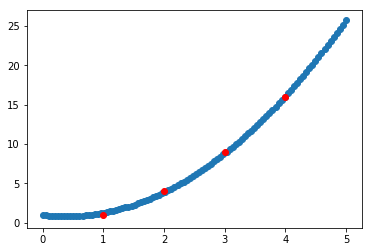

In [83]:
xx = np.linspace(0,5,num=100)
plt.scatter(xx,(xx**2*fin_w2 + xx*fin_w + fin_b))
plt.scatter(x_train,y_train,c="r")
plt.show()